In [39]:
from databaseCommunication import getNCount, readDatabaseFile
from dataframeFormating import fitRun_3b_linear, N_linear, createLabeledDataFrame, createLabeledDataFrame_4, fitRun_1and3b, fitRun_1and3b_2, fitRun_3b, fitRun_3b_2, fitRun_3b_3, getReducedDataframe, getReducedResults, deltaTime, N_polarized, N_polarized_pure3b
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

getNCount(117000)

106662000.0

In [40]:
# [detuning], [imageID_start, imageID_end]
# fifth run (first in df_2) is a lifetime at 1.4 25 GHz ODT3 0.6

labels_decaycurve = [[['25'], [132738, 132941]]]

excluded = []
#label_head = ['name1', 'name2']

In [42]:
"""df = createLabeledDataFrame_4(labels_decaycurve)

df['BECHoldTime'] = df['BECHoldTime'].astype(float)
df['latticeDepth'] = df['latticeDepth'].astype(float)
df['ODT3_Comp'] = df['ODT3_Comp'].astype(float)
df['latticeDetuning'] = df['latticeDetuning'].astype(float)
df['Y_rotation'] = df['Y_rotation'].astype(bool)
df['TOF'] = 8
#df.to_pickle('data_save_210419_decaycurve.pickle')"""

In [32]:
df

,imageID,BECHoldTime,TOF,nCount,xWidth,yWidth,latticeDepth,Y_rotation,ODT3_Comp,latticeDetuning
0,132738.0,600.0,8,76952.0,24.1220,18.8888,1.4,False,0.6,25.0
1,132739.0,50.0,8,113984.0,21.5380,19.0292,1.4,False,0.6,25.0
2,132740.0,80.0,8,123179.0,23.6865,19.5076,1.4,False,0.6,25.0
3,132741.0,4.0,8,102074.0,21.5060,21.0583,1.4,True,0.6,25.0
4,132742.0,18.0,8,131901.0,21.8496,20.7654,1.4,False,0.6,25.0
...,...,...,...,...,...,...,...,...,...,...
199,132937.0,0.5,8,131177.0,20.7826,21.9527,1.4,True,0.6,25.0
200,132938.0,1.0,8,130337.0,19.0969,23.2916,1.4,False,0.6,25.0
201,132939.0,600.0,8,88360.0,23.6923,18.8665,1.4,False,0.6,25.0
202,132940.0,2.0,8,126412.0,21.0556,22.3659,1.4,True,0.6,25.0


In [33]:
df = pd.read_pickle('data_save_210419_decaycurve.pickle')
# Delete these row indexes from dataFrame
indexNames = pd.Index(np.where(df['imageID'].isin(excluded))[0])
df.drop(indexNames, inplace = True)

In [34]:
latticeDepthList = df['latticeDepth'].unique()
Y_rotationList = df['Y_rotation'].unique()
BECHoldTimeList = df['BECHoldTime'].unique()
latticeDetuningList = df['latticeDetuning'].unique()

In [35]:
np.sort(latticeDepthList)

array([1.4])

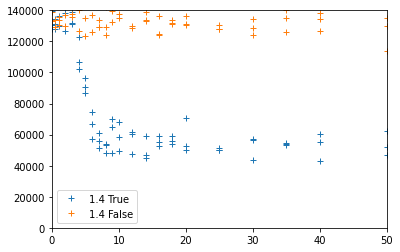

In [43]:
def getRun(df, latticeDepth, Y_rotation, latticeDetuning = 25):
    df_temp = df[df['latticeDepth'] == latticeDepth]
    df_temp2 = df_temp[df_temp['Y_rotation'] == Y_rotation]
    df_temp3 = df_temp2[df_temp2['latticeDetuning'] == latticeDetuning]
    return df_temp3

plt.figure()
for latticeDepth in [1.4]:
    for Y_rotation in [True, False]:
        df_temp = getRun(df, latticeDepth, Y_rotation)
        plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(Y_rotation))
plt.legend()
plt.ylim(0, 140000)
#plt.xlim(0,50)
plt.show()

In [37]:
results = []

for latticeDetuning in latticeDetuningList:
    for latticeDepth in latticeDepthList:
        for Y_rotation in Y_rotationList:
            df_run = getRun(df, latticeDepth, Y_rotation, latticeDetuning)
            popt, pcov = fitRun_3b_3(df_run)
            results += [{'latticeDetuning' : latticeDetuning,
                         'latticeDepth' : latticeDepth,
                         'Y_rotation' : Y_rotation,
                        'N0' : popt[0],
                        'gamma' : popt[1]}]
resultsDF = pd.DataFrame(results)
print('\n')
print(resultsDF)
#perr = np.sqrt(np.diag(pcov))



   latticeDetuning  latticeDepth  Y_rotation             N0         gamma
0             25.0           1.4       False  137137.810054  1.536161e-13
1             25.0           1.4        True  139012.040443  1.198601e-11


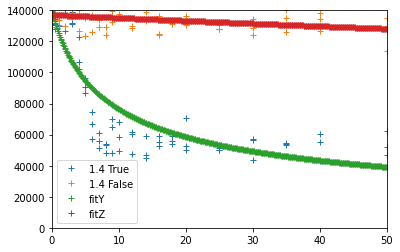

In [46]:
time = np.linspace(0, 1000, 10000)
resultY = resultsDF[resultsDF['Y_rotation'] == True]
resultZ = resultsDF[resultsDF['Y_rotation'] == False]
NY, gammaY = resultY.iloc[0, 3], resultY.iloc[0, 4]
NZ, gammaZ = resultZ.iloc[0, 3], resultZ.iloc[0, 4]
Y = N_polarized_pure3b(time, NY, gammaY)
Z = N_polarized_pure3b(time, NZ, gammaZ)

plt.figure()
for latticeDepth in [1.4]:
    for Y_rotation in [True, False]:
        df_temp = getRun(df, latticeDepth, Y_rotation)
        plt.plot(df_temp['BECHoldTime'], df_temp['nCount'], '+', label = str(round(latticeDepth, 2)) + ' ' + str(Y_rotation))
plt.plot(time, Y, '+', label = 'fitY')
plt.plot(time, Z, '+', label = 'fitZ')
plt.legend()
plt.ylim(0, 140000)
plt.xlim(0,50)
plt.show()